In [1]:
def get_finance_data(path):
    data_path = path
    raw_data = pd.read_excel(data_path,index_col=0)
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
    
    new_big_col = []
    for num, col in enumerate(big_col):
        if 'Unnamed' in col:
            new_big_col.append(new_big_col[num-1])
        else:
            new_big_col.append(big_col[num])
            
    raw_data.columns = [new_big_col, small_col]
    clean_df = raw_data.loc[ raw_data.index.dropna() ]
    
    return clean_df

In [2]:
#  [코드 5.1] 필요한 모듈과 데이터를 가져오기 (Ch5. 백테스트.ipynb)

#import python_quant
import pandas as pd

fs_path = r'재무제표데이터_2018.xlsx'
fs_df = get_finance_data(fs_path)
fr_path = r'재무비율데이터_2018.xlsx'
fr_df = get_finance_data(fr_path)
invest_path = r'투자지표데이터_2018.xlsx'
invest_df = get_finance_data(invest_path)
price_path = r'가격데이터_2020.xlsx'
price_df = pd.read_excel(price_path,index_col=0)

In [3]:
def get_value_rank(invest_df, value_type, index_date, num):
    invest_df[(index_date,  value_type)] = pd.to_numeric(invest_df[(index_date,  value_type)])
    value_sorted = invest_df.sort_values(by=(index_date,  value_type))[index_date]
    value_sorted[  value_type + '순위'] = value_sorted[value_type].rank()
    return value_sorted[[value_type, value_type + '순위']][:num]

In [4]:
#  [코드 5.2] 2015/12 기준으로 저PBR 종목 20개 가져오기 (Ch5. 백테스트.ipynb)

low_pbr_st = get_value_rank(invest_df, 'PBR', '2018/12', 20)

In [5]:
#  [코드 5.3] 종목 코드만 가져오기 (Ch5. 백테스트.ipynb)

low_pbr_st.index

Index(['A021820', 'A008110', 'A001080', 'A036530', 'A100840', 'A003570',
       'A005800', 'A000050', 'A092440', 'A017480', 'A064960', 'A018500',
       'A003610', 'A005390', 'A023000', 'A058400', 'A006650', 'A093240',
       'A079980', 'A008870'],
      dtype='object')

In [6]:
#  [코드 5.4] 저pbr 주식들의 2016년 1월 이후의 가격 데이터 가져오기 (Ch5. 백테스트.ipynb)

code_list = []
for code in low_pbr_st.index:
    code_list.append(code.replace('A',''))
    
pbr_price = price_df[code_list]['2019-05':]
#pbr_price = price_df[code_list]['2016-06':]
pbr_price

,021820,008110,001080,036530,100840,003570,005800,000050,092440,017480,064960,018500,003610,005390,023000,058400,006650,093240,079980,008870
2019-05-02,8610.0,3690.0,18700.0,13100.0,13000.0,7630.0,117000.0,11300.0,4015.0,4690.0,38000.0,866.0,2405.0,953.0,3005.0,877.0,150000.0,1915.0,8090.0,73600.0
2019-05-03,8570.0,3740.0,19200.0,13150.0,13200.0,7630.0,118000.0,11400.0,3950.0,4635.0,37150.0,868.0,2385.0,1010.0,3025.0,881.0,148000.0,1900.0,8020.0,72700.0
2019-05-07,8470.0,3690.0,19450.0,13800.0,13650.0,7640.0,118000.0,11400.0,4000.0,4580.0,36150.0,882.0,2385.0,1015.0,2990.0,881.0,149000.0,1850.0,7860.0,71400.0
2019-05-08,8300.0,3790.0,19450.0,14200.0,14050.0,7500.0,119000.0,11250.0,4000.0,4585.0,37100.0,886.0,2390.0,1015.0,3010.0,880.0,151500.0,1840.0,7860.0,72100.0
2019-05-09,8190.0,3715.0,18800.0,13800.0,13500.0,7400.0,117000.0,10950.0,3990.0,4555.0,36150.0,858.0,2355.0,1025.0,2995.0,870.0,144500.0,1775.0,7670.0,69900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29,8090.0,4480.0,14800.0,14450.0,15100.0,5150.0,95500.0,10550.0,3685.0,3725.0,50800.0,703.0,1925.0,1635.0,2410.0,1760.0,166500.0,2000.0,7620.0,57200.0
2020-10-05,8090.0,4490.0,14900.0,14450.0,15250.0,5200.0,94300.0,10850.0,3690.0,3790.0,54200.0,704.0,1975.0,1655.0,2420.0,1815.0,188500.0,2050.0,7990.0,57100.0
2020-10-06,8090.0,4600.0,15000.0,14550.0,15350.0,5250.0,95900.0,10900.0,4035.0,3790.0,53100.0,702.0,1945.0,1660.0,2455.0,1780.0,183000.0,2020.0,8050.0,56400.0
2020-10-07,8090.0,4600.0,15100.0,14550.0,15500.0,5290.0,95500.0,10900.0,4050.0,3795.0,52000.0,700.0,1940.0,1695.0,2440.0,1810.0,185500.0,2035.0,8030.0,56400.0


In [7]:
#  [코드 5.5] 각 종목마다 몇 개씩 살지 계산하여 포트폴리오 구성 (Ch5. 백테스트.ipynb)

pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns:
    temp = int( 5000000 / pbr_price[code][0] )
    pf_stock_num[code] = temp
    stock_amount = stock_amount + temp * pbr_price[code][0]
    
cash_amount = 100000000 - stock_amount
cash_amount
pf_stock_num

{'021820': 580,
 '008110': 1355,
 '001080': 267,
 '036530': 381,
 '100840': 384,
 '003570': 655,
 '005800': 42,
 '000050': 442,
 '092440': 1245,
 '017480': 1066,
 '064960': 131,
 '018500': 5773,
 '003610': 2079,
 '005390': 5246,
 '023000': 1663,
 '058400': 5701,
 '006650': 33,
 '093240': 2610,
 '079980': 618,
 '008870': 67}

In [8]:
#  [코드 5.6] 주식 포트폴리오의 변화 구하기 (Ch5. 백테스트.ipynb)

stock_pf = 0
for code in pbr_price.columns:
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code]

stock_pf
#null_data = stock_pf[stock_pf.isnull()]
#null_data

2019-05-02     99727128.0
2019-05-03     99952665.0
2019-05-07     99958652.0
2019-05-08    100479678.0
2019-05-09     98396749.0
                 ...     
2020-09-29    103214229.0
2020-10-05    105571232.0
2020-10-06    105772321.0
2020-10-07    106162970.0
2020-10-08    106887608.0
Length: 356, dtype: float64

In [9]:
print(stock_pf)

2019-05-02     99727128.0
2019-05-03     99952665.0
2019-05-07     99958652.0
2019-05-08    100479678.0
2019-05-09     98396749.0
                 ...     
2020-09-29    103214229.0
2020-10-05    105571232.0
2020-10-06    105772321.0
2020-10-07    106162970.0
2020-10-08    106887608.0
Length: 356, dtype: float64


In [10]:
#  [코드 5.7] 주식 포트폴리오 데이터프레임으로 만들어주기 (Ch5. 백테스트.ipynb)

low_pbr_backtest = pd.DataFrame({'주식포트폴리오':stock_pf[:'2020-5']})
low_pbr_backtest

,주식포트폴리오
2019-05-02,99727128.0
2019-05-03,99952665.0
2019-05-07,99958652.0
2019-05-08,100479678.0
2019-05-09,98396749.0
...,...
2020-05-25,92138784.0
2020-05-26,93469941.0
2020-05-27,93638924.0
2020-05-28,92595850.0


In [11]:
#  [코드 5.8] 현금 포트폴리오 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['현금포트폴리오'] = [cash_amount] * len(low_pbr_backtest)
low_pbr_backtest

,주식포트폴리오,현금포트폴리오
2019-05-02,99727128.0,272872.0
2019-05-03,99952665.0,272872.0
2019-05-07,99958652.0,272872.0
2019-05-08,100479678.0,272872.0
2019-05-09,98396749.0,272872.0
...,...,...
2020-05-25,92138784.0,272872.0
2020-05-26,93469941.0,272872.0
2020-05-27,93638924.0,272872.0
2020-05-28,92595850.0,272872.0


In [12]:
#  [코드 5.9] 종합 포트폴리오와 일 변화율 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['종합포트폴리오'] =  low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()

In [13]:
#  [코드 5.10] 초기 투자금 대비 변화율 데이터프레임에 추가하기 (Ch5. 백테스트.ipynb)

low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1

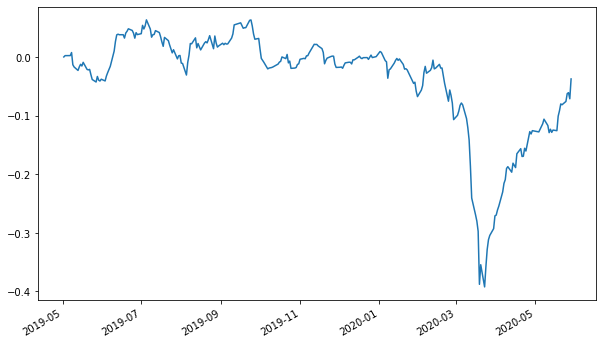

In [14]:
#  [코드 5.11] 초기 투자금 대비 변화율 그래프 그리기 (Ch5. 백테스트.ipynb)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
low_pbr_backtest['총변화율'].plot()
plt.show()

In [15]:
#  [코드 5.12] 백테스트 함수 버젼1 (Ch5. 백테스트.ipynb)


def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):

    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))
    
    #price_df.index = price_df['time']
    strategy_price = price_df[code_list][start_date:end_date]

    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    for code in strategy_price.columns:
        temp = int( each_money / strategy_price[code][0] )
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1
    
    return backtest_df

In [16]:
def get_value_rank(invest_df, value_type, index_date, num):
    invest_df[(index_date,  value_type)] = pd.to_numeric(invest_df[(index_date,  value_type)])
    value_sorted = invest_df.sort_values(by=(index_date,  value_type))[index_date]
    value_sorted[  value_type + '순위'] = value_sorted[value_type].rank()
    return value_sorted[[value_type, value_type + '순위']][:num]

In [17]:
#  [코드 5.13] 저per 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'
initial_money = 100000000

low_per = get_value_rank(invest_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

In [18]:
#  [코드 5.14] 특정 날짜에 가격 데이터프레임에 데이터가 존재하는 종목들 리스트 가져오기 (Ch5. 백테스트.ipynb)

price_df[start_date].iloc[0].index

Index(['060310', '095570', '068400', '006840', '054620', '265520', '211270',
       '027410', '282330', '138930',
       ...
       '084110', '145020', '069260', '024060', '010240', '189980', '000540',
       '003280', '037440', '238490'],
      dtype='object', length=2266)

In [19]:
#  [코드 5.15] 종목 코드 앞에 'A'붙이기 (Ch5. 백테스트.ipynb)

new_code_list = []
for code in price_df[start_date].iloc[0].index:
    new_code_list.append('A' + code)

In [20]:
new_code_list

['A060310',
 'A095570',
 'A068400',
 'A006840',
 'A054620',
 'A265520',
 'A211270',
 'A027410',
 'A282330',
 'A138930',
 'A001460',
 'A001040',
 'A079160',
 'A035760',
 'A000120',
 'A011150',
 'A097950',
 'A051500',
 'A037560',
 'A058820',
 'A023460',
 'A065770',
 'A083660',
 'A000590',
 'A012030',
 'A306620',
 'A016610',
 'A005830',
 'A000990',
 'A139130',
 'A068790',
 'A004840',
 'A241520',
 'A155660',
 'A069730',
 'A017940',
 'A245620',
 'A037370',
 'A079190',
 'A007700',
 'A130500',
 'A114090',
 'A032860',
 'A900290',
 'A078930',
 'A083450',
 'A006360',
 'A001250',
 'A007070',
 'A028150',
 'A045890',
 'A078150',
 'A012630',
 'A039570',
 'A089470',
 'A294870',
 'A036640',
 'A082740',
 'A299170',
 'A254120',
 'A264850',
 'A276920',
 'A297570',
 'A095340',
 'A099520',
 'A175330',
 'A950170',
 'A234080',
 'A067290',
 'A001060',
 'A096760',
 'A035900',
 'A105560',
 'A024120',
 'A021320',
 'A036670',
 'A009440',
 'A112190',
 'A119650',
 'A044180',
 'A092220',
 'A151860',
 'A046440',
 'A0

In [21]:
print(len(invest_df))
print(len(price_df))

2262
1905


In [22]:
invest_df.index

Index(['A060310', 'A095570', 'A068400', 'A006840', 'A054620', 'A265520',
       'A211270', 'A027410', 'A282330', 'A138930',
       ...
       'A084110', 'A145020', 'A069260', 'A024060', 'A010240', 'A189980',
       'A000540', 'A003280', 'A037440', 'A238490'],
      dtype='object', length=2262)

In [23]:
invest_df.loc['A060310']

2010/12  PBR       NaN
         PCR       NaN
         PER       NaN
         PSR       NaN
         총현금흐름     NaN
                  ... 
2018/12  PBR      3.06
         PCR       NaN
         PER       NaN
         PSR       NaN
         총현금흐름      12
Name: A060310, Length: 230, dtype: object

In [24]:
#  [코드 5.16] 해당 날짜에 가격이 없으면 투자 관련 데이터에서 해당 종목 없애는 함수 (Ch5. 백테스트.ipynb)

def select_code_by_price(price_df, data_df, start_date):
    new_code_list = []
    for code in price_df[start_date].iloc[0].dropna().index:
        code_a = 'A' + code
        if code_a in data_df.index:
            new_code_list.append(code_a)
        else:
            continue
    
    selected_df =  data_df.loc[new_code_list]
    return selected_df

In [25]:
new_code_list


['A060310',
 'A095570',
 'A068400',
 'A006840',
 'A054620',
 'A265520',
 'A211270',
 'A027410',
 'A282330',
 'A138930',
 'A001460',
 'A001040',
 'A079160',
 'A035760',
 'A000120',
 'A011150',
 'A097950',
 'A051500',
 'A037560',
 'A058820',
 'A023460',
 'A065770',
 'A083660',
 'A000590',
 'A012030',
 'A306620',
 'A016610',
 'A005830',
 'A000990',
 'A139130',
 'A068790',
 'A004840',
 'A241520',
 'A155660',
 'A069730',
 'A017940',
 'A245620',
 'A037370',
 'A079190',
 'A007700',
 'A130500',
 'A114090',
 'A032860',
 'A900290',
 'A078930',
 'A083450',
 'A006360',
 'A001250',
 'A007070',
 'A028150',
 'A045890',
 'A078150',
 'A012630',
 'A039570',
 'A089470',
 'A294870',
 'A036640',
 'A082740',
 'A299170',
 'A254120',
 'A264850',
 'A276920',
 'A297570',
 'A095340',
 'A099520',
 'A175330',
 'A950170',
 'A234080',
 'A067290',
 'A001060',
 'A096760',
 'A035900',
 'A105560',
 'A024120',
 'A021320',
 'A036670',
 'A009440',
 'A112190',
 'A119650',
 'A044180',
 'A092220',
 'A151860',
 'A046440',
 'A0

In [26]:
strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'

input_df = select_code_by_price(price_df, invest_df, start_date)

In [27]:
#  [코드 5.17] 저per 포트폴리오 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'
initial_money = 100000000

low_per = get_value_rank(input_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

In [28]:
low_per

,PER,PER순위
A006650,3.88,1.0
A064960,7.03,2.0
A036530,7.72,3.0
A002350,9.22,4.0
A023000,9.52,5.0
A017480,10.01,6.0
A003570,11.80,7.0
A134380,12.81,8.0
A079980,14.02,9.0
A058400,14.13,10.0


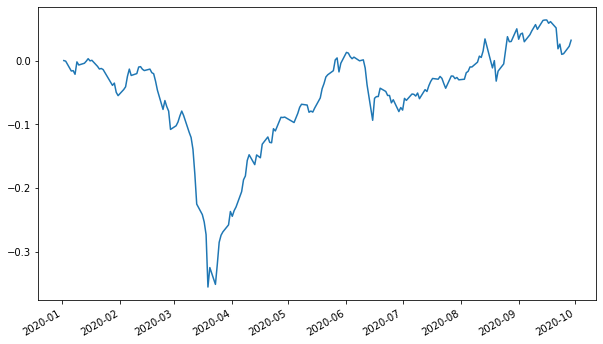

In [29]:
#  [코드 5.18] 저per 백테스트 결과 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 6))
per_backtest['총변화율'].plot()
plt.show()

## 9월13일 여기까지


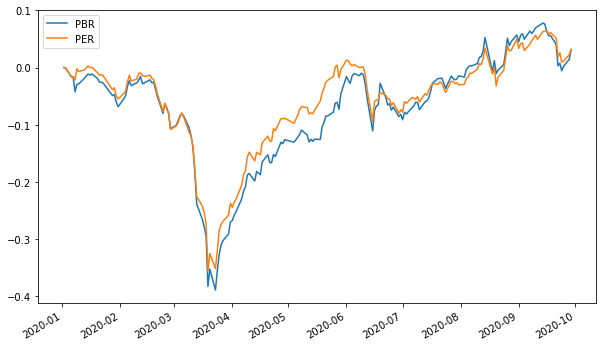

In [30]:
#  [코드 5.19] 저pbr, 저per 전략 비교하기 (Ch5. 백테스트.ipynb)

strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'
initial_money = 100000000

low_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, 20)
low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
plt.legend()
plt.show()

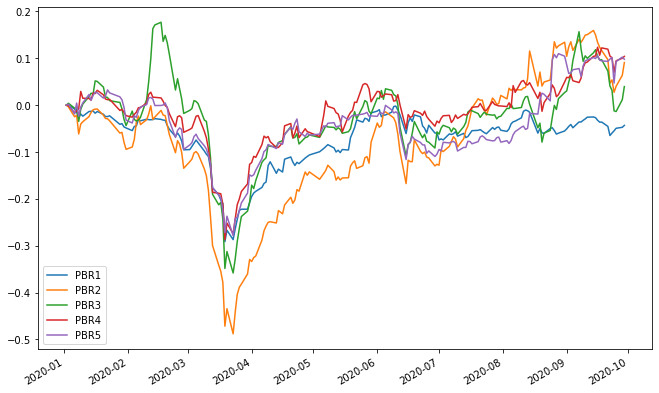

In [31]:
#  [코드 5.20] pbr 구간별 수익률 비교 (Ch5. 백테스트.ipynb)

strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'
initial_money = 100000000

all_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

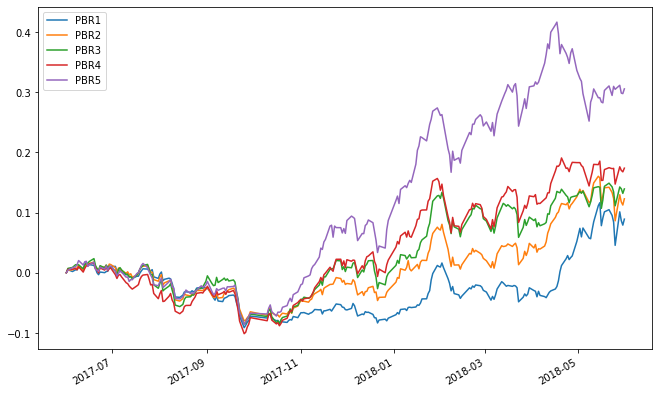

In [32]:
#  [코드 5.21] 연도를 바꾼 뒤 pbr 구간별 수익률 비교 (Ch5. 백테스트.ipynb)

strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 100000000

all_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

In [33]:
def get_fscore(fs_df, index_date, num):
    fscore_df = fs_df[index_date]
    fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
    fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름'] > 0
    fscore_df['더큰영업활동점수'] = fscore_df['영업활동으로인한현금흐름'] > fscore_df['당기순이익']
    fscore_df['종합점수'] = fscore_df[['당기순이익점수', '영업활동점수', '더큰영업활동점수']].sum(axis=1)
    fscore_df = fscore_df[fscore_df['종합점수'] == 3]
    return fscore_df[:num]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

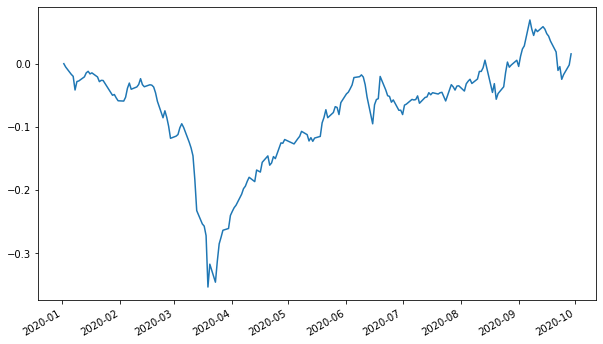

In [34]:
# [코드 5.22] fscroe 백테스트 (Ch5. 백테스트.ipynb)

strategy_date = '2018/12'
start_date = '2020-1'
end_date = '2020-9'
initial_money = 100000000

f_score_result = get_fscore(select_code_by_price(price_df, fs_df, start_date), strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score_result, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
f_score_backtest['총변화율'].plot()
plt.show()

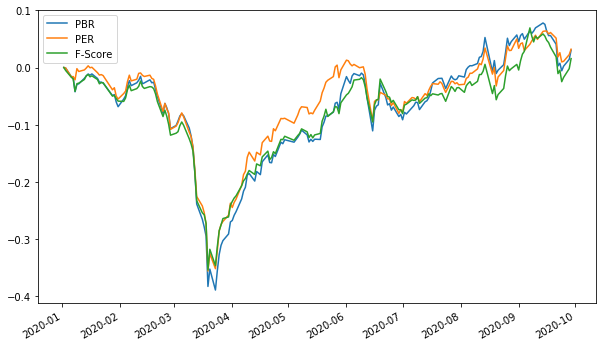

In [35]:
# [코드 5.23] fscroe, 저PER, 저PBR 전략 비교 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
f_score_backtest['총변화율'].plot(label='F-Score')
plt.legend()
plt.show()

In [36]:
# [코드 5.24] 백테스트 시작날짜가 주어지면 전략 기준 날짜를 계산하는 함수 (Ch5. 백테스트.ipynb)

def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year - 2) + '/12'
    else:
        strategy_date = str(temp_year - 1) + '/12'
    return strategy_date

In [37]:
# [코드 5.25] 백테스트 기간이 주어지면 리밸런싱 주기로 나누기 (Ch5. 백테스트.ipynb)

start_date = '2017-6'
end_date = '2020-5'

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

for temp in range(start_year, end_year):
    print(str(temp) + '-6', str(temp+1) + '-6')

2017-6 2018-6
2018-6 2019-6
2019-6 2020-6


In [39]:
# [코드 5.26] 2기간 동안 리밸런싱 한 번 하면서 백테스트 하기 (Ch5. 백테스트.ipynb)

start_date1 = '2017-6'
end_date1 = '2018-6'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)

start_date2 = '2018-6'
end_date2 = '2019-6'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = 100000000

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)

In [41]:
# [코드 5.27] 2기간 동안 리밸런싱 한 번 하면서 백테스트 하기 개선 (Ch5. 백테스트.ipynb)

start_date1 = '2017-6'
end_date1 = '2018-6'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)
temp_end1 = per_backtest1[end_date1].index[0]
per_backtest1 = per_backtest1[:temp_end1]

start_date2 = '2018-6'
end_date2 = '2019-6'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = per_backtest1['종합포트폴리오'][-1]

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
temp_end2 = per_backtest2[end_date2 ].index[0]
per_backtest2 = per_backtest2[:temp_end2]

In [42]:
# [코드 5.28] 두 번의 백테스트 기간 동안 생성된 2개의 데이터프레임을 붙이기 (Ch5. 백테스트.ipynb)

total_backtest = pd.concat([per_backtest1[:-1], per_backtest2])

In [43]:
# [코드 5.29] 이어 붙인 데이터프레임에서 변화율들을 다시 계산하여 저장 (Ch5. 백테스트.ipynb)

total_backtest['일변화율'] = total_backtest['종합포트폴리오'].pct_change()
total_backtest['총변화율'] = total_backtest['종합포트폴리오']/ total_backtest['종합포트폴리오'][0] - 1

In [44]:
# [코드 5.30] 리밸런싱 코드 for문으로 정리 (Ch5. 백테스트.ipynb)

start_date = '2017-6'
end_date = '2019-6'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

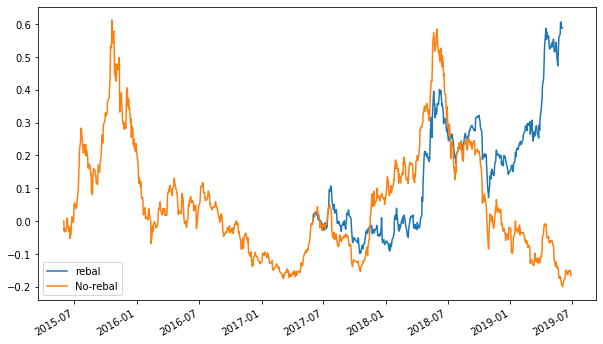

In [49]:
# [코드 5.31] 저PER 전략 리밸러싱 있는 경우와 없는 경우 비교 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2019-6'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
total_backtest['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()

## 10월 11일 여기까지

In [225]:
# [코드 5.32] 리밸런싱 백테스트 함수화 (Ch5. 백테스트.ipynb)

def backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, num, value_type=None, value_list=None, date_range=None):
    
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])

    total_df = 0
    for temp in range(start_year, end_year):
        this_term_start = str(temp) + '-' + start_date.split('-')[1]
        this_term_end = str(temp+1) + '-' + start_date.split('-')[1]
        strategy_date = get_strategy_date(this_term_start)
        
        if strategy.__name__ == 'high_roa':
            st_df = strategy(select_code_by_price(price_df, fr_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'magic_formula':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_value_rank':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), value_type, strategy_date, num)
        elif strategy.__name__ == 'make_value_combo':
            st_df = strategy(value_list, select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_fscore':
            st_df = strategy(select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_momentum_rank':
            st_df = strategy(price_df, price_df[this_term_start].index[0] , date_range, num)
        elif strategy.__name__ == 'get_value_quality':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), 
                             select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        
        backtest = backtest_beta(price_df, st_df, this_term_start, this_term_end, initial_money)
        temp_end = backtest[this_term_end].index[0]
        backtest = backtest[:temp_end]
        initial_money =  backtest['종합포트폴리오'][-1]
        if temp == start_year:
            total_df = backtest
        else:
            total_df = pd.concat([total_df[:-1], backtest])

    total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
    total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
    
    return total_df

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


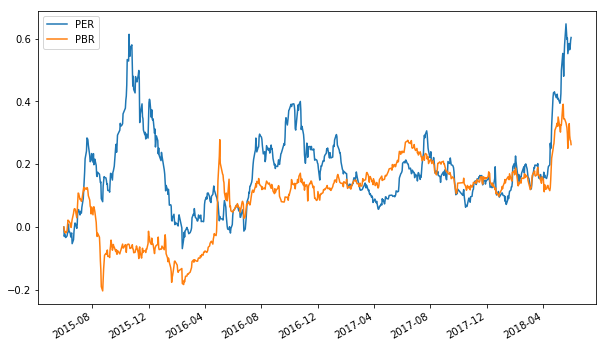

In [226]:
# [코드 5.33] 저PER과 저PBR 비교 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


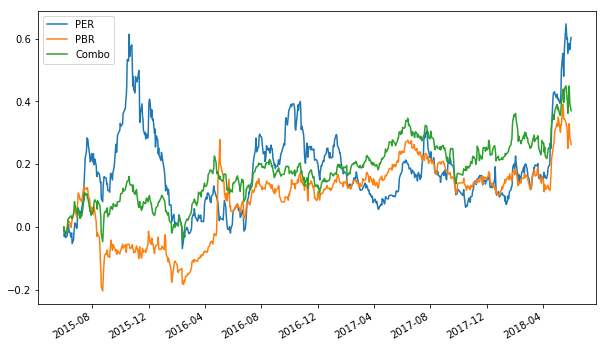

In [227]:
# [코드 5.34] 저PER과 저PBR, 혼합 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
strategy2 = python_quant.make_value_combo

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')
back_test_result3 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result3['총변화율'].plot(label='Combo')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\jk\anaconda3\python_quant.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
c:\users\jk\anaconda3\python_quant.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

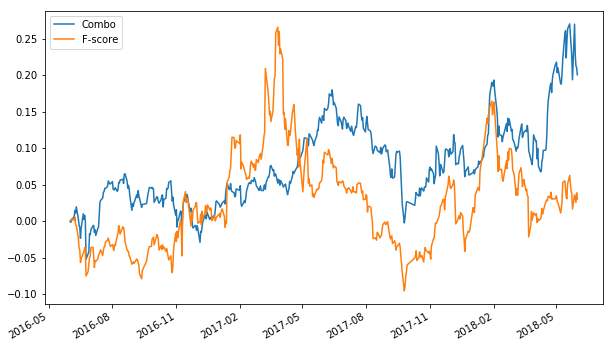

In [229]:
# [코드 5.35] F-score와 혼합 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='Combo')
back_test_result2['총변화율'].plot(label='F-score')
plt.legend()
plt.show()

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\jk\anaconda3\python_quant.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fscore_df['당기순이익점수'] = fscore_df['당기순이익'] > 0
c:\users\jk\anaconda3\python_quant.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

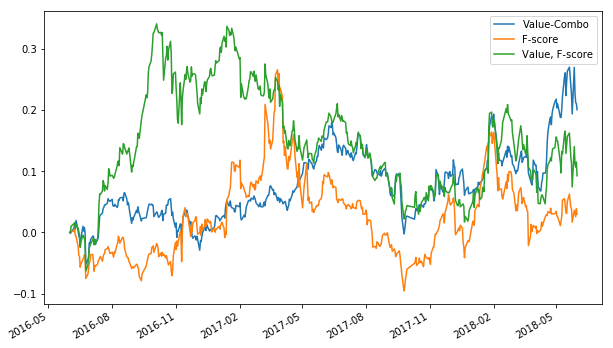

In [230]:
# [코드 5.36] F-score, PBR+PER, F-score+PBR+PER 전략 비교 (Ch5. 백테스트.ipynb)

start_date = '2016-6'
end_date = '2018-6'
initial_money = 100000000
strategy1 = python_quant.make_value_combo
strategy2 = python_quant.get_fscore
strategy3 = python_quant.get_value_quality

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
back_test_result3 = backtest_re(strategy3, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER+PBR')
back_test_result2['총변화율'].plot(label='F-score')
back_test_result3['총변화율'].plot(label='Value + F-score')
plt.legend()
plt.show()

In [293]:
# [코드 5.37] CAGR 계산 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank
back_test_result = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')

num_of_year = int(end_date.split('-')[0]) - int(start_date.split('-')[0])
CAGR = (back_test_result.iloc[-1]['종합포트폴리오'] / back_test_result.iloc[0]['종합포트폴리오']) ** (1/num_of_year) - 1

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [294]:
# [코드 5.38] MDD 계산 (Ch5. 백테스트.ipynb)

max_list = [0]
mdd_list = [0]

for i in back_test_result.index[1:]:
    max_list.append(back_test_result['총변화율'][:i].max())
    if max_list[-1] > max_list[-2]:
        mdd_list.append(0)
    else:
        mdd_list.append(min(back_test_result['총변화율'][i] - max_list[-1], mdd_list[-1])   )
        
back_test_result['max'] = max_list
back_test_result['MDD'] = mdd_list

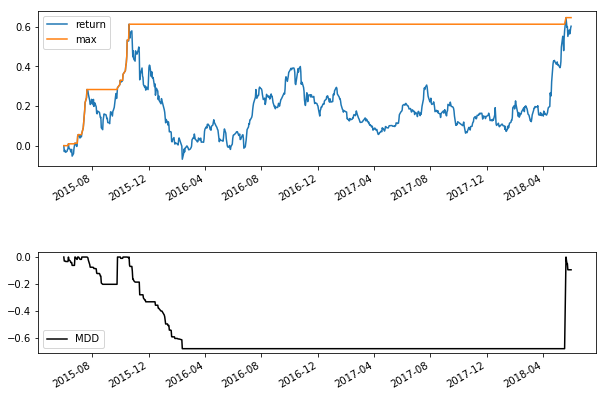

In [331]:
# [코드 5.39] MDD 그래프 그리기 (Ch5. 백테스트.ipynb)

plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result['총변화율'].plot(label='return')
back_test_result['max'].plot(label='max')
plt.legend()

plt.subplot(3,1,3)
back_test_result['MDD'].plot(label='MDD', c='black')
plt.legend()

In [324]:
# [코드 5.40] MDD 함수화 (Ch5. 백테스트.ipynb)

def get_mdd(back_test_df):
    max_list = [0]
    mdd_list = [0]

    for i in back_test_df.index[1:]:
        max_list.append(back_test_df['총변화율'][:i].max())
        if max_list[-1] > max_list[-2]:
            mdd_list.append(0)
        else:
            mdd_list.append(min(back_test_df['총변화율'][i] - max_list[-1], mdd_list[-1])   )

    back_test_df['max'] = max_list
    back_test_df['MDD'] = mdd_list
    
    return back_test_df

c:\users\jk\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


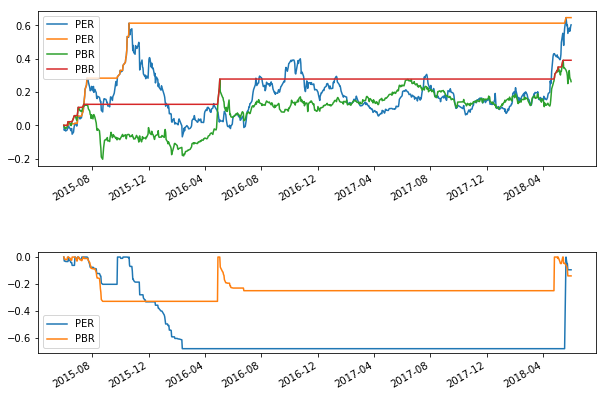

In [332]:
# [코드 5.41] MDD 비교하기 (Ch5. 백테스트.ipynb)

start_date = '2015-6'
end_date = '2018-5'
initial_money = 100000000
strategy = python_quant.get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

back_test_result1 = get_mdd(back_test_result1)
back_test_result2 = get_mdd(back_test_result2)


plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result1['총변화율'].plot(label='PER')
back_test_result1['max'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result2['max'].plot(label='PBR')
plt.legend()

plt.subplot(3,1,3)
back_test_result1['MDD'].plot(label='PER')
back_test_result2['MDD'].plot(label='PBR')
plt.legend()